In [204]:
# Initial imports
import numpy as np
import pandas as pd
from pathlib import Path

%matplotlib inline

In [205]:
 # Set path to CSV and read in CSV
csv_path = Path("DATA/DOGE/DOGE_DATA.csv")
doge_df=pd.read_csv(csv_path)

In [206]:
 # Set index as Date
doge_df = doge_df.set_index(pd.to_datetime(doge_df["Date"], infer_datetime_format=True))

# Display sample data
doge_df.head(10)

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,,
2019-02-27,DOGE,2019-02-27,0.001944,0.001962,0.001963,0.001908
2019-02-28,DOGE,2019-02-28,0.001912,0.001944,0.001955,0.001896
2019-03-01,DOGE,2019-03-01,0.001956,0.001912,0.001977,0.001911
2019-03-02,DOGE,2019-03-02,0.001970,0.001957,0.001980,0.001940
2019-03-03,DOGE,2019-03-03,0.001948,0.001970,0.001989,0.001940
2019-03-04,DOGE,2019-03-04,0.001900,0.001948,0.001960,0.001893
2019-03-05,DOGE,2019-03-05,0.001939,0.001902,0.001964,0.001891
2019-03-06,DOGE,2019-03-06,0.001931,0.001939,0.001961,0.001919
2019-03-07,DOGE,2019-03-07,0.001944,0.001931,0.001990,0.001927


In [207]:
#check for na
doge_df.isnull().values.any()

False

In [208]:
# Set the random seed to (2)
from numpy.random import seed

seed(1)
from tensorflow import random

random.set_seed(2)

In [209]:
def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window):
        features = df.iloc[i : (i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [231]:
# Define the window size
window_size = 100

# Set the index of the feature and target columns
feature_column = 2
target_column = 2

# Create the features (X) and target (y) data using the window_data() function.
X, y = window_data(doge_df, window_size, feature_column, target_column)

# Print a few sample values from X and y
print (f"X sample values:\n{X[:3]} \n")
print (f"y sample values:\n{y[:3]}")

X sample values:
[[0.00194413 0.00191243 0.00195579 0.00196963 0.00194837 0.0018997
  0.0019386  0.00193116 0.0019439  0.00192575 0.00195179 0.00195127
  0.0019291  0.00199423 0.0019794  0.00201348 0.00202135 0.00204606
  0.0020523  0.00204451 0.00204142 0.00202512 0.00202262 0.00200737
  0.00200919 0.00200528 0.00201154 0.00203147 0.00205462 0.00204445
  0.00208126 0.00207596 0.00206667 0.00241034 0.00292721 0.003173
  0.00364039 0.00352948 0.00336789 0.00339882 0.00294825 0.00287584
  0.00296385 0.00274343 0.00281366 0.0028431  0.00286845 0.00274786
  0.00277609 0.0027763  0.00295894 0.00289124 0.00285828 0.00275998
  0.00276394 0.00276767 0.00256035 0.00241539 0.00252244 0.00253833
  0.00243369 0.00241323 0.00248825 0.00245055 0.00254029 0.00267698
  0.00267155 0.0025769  0.00256247 0.00252779 0.00253745 0.00246249
  0.00254303 0.00275622 0.00263807 0.00272007 0.00301285 0.00328175
  0.00319722 0.00289653 0.00299698 0.00312798 0.00297548 0.00304195
  0.00291579 0.00295498 0.00301222

In [232]:
 # Manually splitting the data
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

In [233]:
 # Importing the MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the MinMaxScaler object with the features data X
scaler.fit(X)

# Scale the features training and testing sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit the MinMaxScaler object with the target data Y
scaler.fit(y)

# Scale the target training and testing sets
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [234]:
 # Reshape the features data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Print some sample data after reshaping the datasets
print (f"X_train sample values:\n{X_train[:3]} \n")
print (f"X_test sample values:\n{X_test[:3]}")

X_train sample values:
[[[0.00095741]
  [0.00079557]
  [0.00090006]
  [0.0009334 ]
  [0.00088217]
  [0.0007649 ]
  [0.00085863]
  [0.00084071]
  [0.00087141]
  [0.00082767]
  [0.00089042]
  [0.00088917]
  [0.00083574]
  [0.00099269]
  [0.00095696]
  [0.00099162]
  [0.00081167]
  [0.00072461]
  [0.00073436]
  [0.00064131]
  [0.00063701]
  [0.0006144 ]
  [0.00061093]
  [0.00058978]
  [0.00059231]
  [0.00058688]
  [0.00059556]
  [0.00062321]
  [0.00065533]
  [0.00064122]
  [0.0006923 ]
  [0.00068494]
  [0.00067206]
  [0.00114888]
  [0.00186603]
  [0.00220706]
  [0.00285553]
  [0.00270165]
  [0.00247745]
  [0.00252036]
  [0.00189522]
  [0.00179475]
  [0.00191687]
  [0.00161104]
  [0.00170848]
  [0.00174932]
  [0.0017845 ]
  [0.00161719]
  [0.00165635]
  [0.00165665]
  [0.00191006]
  [0.00181612]
  [0.00177039]
  [0.001634  ]
  [0.00163949]
  [0.00164467]
  [0.00135702]
  [0.00115589]
  [0.00130442]
  [0.00132646]
  [0.00118129]
  [0.00115289]
  [0.00125698]
  [0.00120467]
  [0.00132919]
  

In [235]:
 # Importing required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [236]:
# Define the LSTM RNN model.
model = Sequential()

# Initial model setup
number_units = 100
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

In [237]:
 # Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [238]:
# Show the model summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 100, 100)          40800     
_________________________________________________________________
dropout_22 (Dropout)         (None, 100, 100)          0         
_________________________________________________________________
lstm_23 (LSTM)               (None, 100, 100)          80400     
_________________________________________________________________
dropout_23 (Dropout)         (None, 100, 100)          0         
_________________________________________________________________
lstm_24 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dropout_24 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [239]:
# Train the model
model.fit(X_train, y_train, epochs=100, shuffle=False, batch_size=90, verbose=1)

Epoch 1/100
7/7 [==============================] - 4s 35ms/step - loss: 1.7492e-04
Epoch 2/100
7/7 [==============================] - 0s 27ms/step - loss: 5.1241e-05
Epoch 3/100
7/7 [==============================] - 0s 25ms/step - loss: 1.4904e-05
Epoch 4/100
7/7 [==============================] - 0s 22ms/step - loss: 9.3159e-06
Epoch 5/100
7/7 [==============================] - 0s 23ms/step - loss: 3.9433e-06
Epoch 6/100
7/7 [==============================] - 0s 26ms/step - loss: 3.7696e-06
Epoch 7/100
7/7 [==============================] - 0s 23ms/step - loss: 1.4758e-06
Epoch 8/100
7/7 [==============================] - 0s 24ms/step - loss: 1.4360e-06
Epoch 9/100
7/7 [==============================] - 0s 23ms/step - loss: 8.7926e-07
Epoch 10/100
7/7 [==============================] - 0s 22ms/step - loss: 8.2195e-07
Epoch 11/100
7/7 [==============================] - 0s 23ms/step - loss: 8.6545e-07
Epoch 12/100
7/7 [==============================] - 0s 24ms/step - loss: 6.5224e-07
E

In [240]:
 # Make predictions using the testing data X_test
predicted = model.predict(X_test)

In [241]:
predicted.shape

(235, 1)

In [242]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [243]:
 # Create a DataFrame of Real and Predicted values
doge_eval = pd.DataFrame({
    "Actual": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = doge_df.index[-len(real_prices): ]) 

# Show the DataFrame's head
doge_eval.head()

,Actual,Predicted
Date,,
2020-12-05,0.003401,0.002681
2020-12-06,0.003386,0.002680
2020-12-07,0.003320,0.002680
2020-12-08,0.003216,0.002680
2020-12-09,0.003213,0.002679


<AxesSubplot:title={'center':'Actual Vs. Predicted ETH Prices'}, xlabel='Date'>

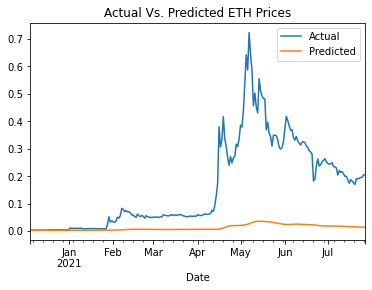

In [244]:
 # Plot the real vs predicted prices as a line chart
doge_eval.plot(title="Actual Vs. Predicted ETH Prices")

In [245]:
#seprate actual and pred
Pred= doge_eval['Actual']
act= doge_eval['Predicted']

#model eval
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(act, Pred))
print(math.sqrt(mean_squared_error(act, Pred)))
print(mean_absolute_error(act, Pred))

0.04528726206144079
0.2128080404059978
0.14889060520157169


In [246]:
#create buy and sell signals 
#calculate profit and loss

#create 'profit/loss' column to track trade metrics
doge_eval['profit/loss'] = np.nan

#create column to hold buy and cell signals
doge_eval['signals'] = np.nan

#create buy and sell list containers
buy = []
sell = []

#create column that has next days price
doge_eval['next_day'] = doge_eval["Predicted"].shift(-1)

In [247]:
#create loop that buys if next day price is higer and sells if next day price goes down
for index, row in doge_eval.iterrows():

    if row["Predicted"] > row["next_day"]:
        doge_eval.loc[index, "signals"] = "buy"
        buy.append(row["Actual"])
        doge_eval.loc[index, "profit/loss"] = 0
    elif row["Predicted"] < row["next_day"]:
        doge_eval.loc[index, "signals"] = "sell"
        sell.append(row["Actual"])
        #doge_eval.loc[index, "profit/loss"] = sell[-1] - buy[-1]
    else:
        doge_eval.loc[index, "signals"] = "hold"


In [248]:
#create loop that buys if next day price is higer and sells if next day price goes down
for index, row in doge_eval.iterrows():

    if row["Predicted"] > row["next_day"]:
        doge_eval.loc[index, "signals"] = "buy"
        buy.append(row["Actual"])
        doge_eval.loc[index, "profit/loss"] = 0
    elif row["Predicted"] < row["next_day"]:
        doge_eval.loc[index, "signals"] = "sell"
        sell.append(row["Actual"])
        doge_eval.loc[index, "profit/loss"] = sell[-1] - buy[-1]
    else:
        doge_eval.loc[index, "signals"] = "hold"


In [249]:
doge_eval.dropna(inplace= True)

In [250]:
doge_eval

,Actual,Predicted,profit/loss,signals,next_day
Date,,,,,
2020-12-05,0.003401,0.002681,0.000000,buy,0.002680
2020-12-06,0.003386,0.002680,0.000000,buy,0.002680
2020-12-07,0.003320,0.002680,0.000000,buy,0.002680
2020-12-08,0.003216,0.002680,0.000000,buy,0.002679
2020-12-09,0.003213,0.002679,0.000000,buy,0.002678
...,...,...,...,...,...
2021-07-22,0.190272,0.014612,0.000000,buy,0.014448
2021-07-23,0.192075,0.014448,0.000000,buy,0.014343
2021-07-24,0.195292,0.014343,0.000000,buy,0.014294


In [251]:
# calculate total profit/loss and percent return for 1000 total coins

# total amount of initial capital
initial_capital = 1000000

# set total amount of coins
coin_order = 1000

# calculate total profit/loss
total_profit_loss = round(doge_eval["profit/loss"].sum() * coin_order, 2)

# calculate return on investemnt 
roi = round((total_profit_loss / initial_capital) * 100, 2)

# display profit/loss and roi
print(
    f"The total profit/loss of the trading model is ${total_profit_loss}, "
    f"with the total return on investment being {roi}%"
)

The total profit/loss of the trading model is $10747.85, with the total return on investment being 1.07%
